In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

### Exemplo simples

Neste exemplo simples vamos gerar quatro clusters obviamente separáveis
e executar o K-means já com $n_{\text{clusters}} = 4$.

In [14]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

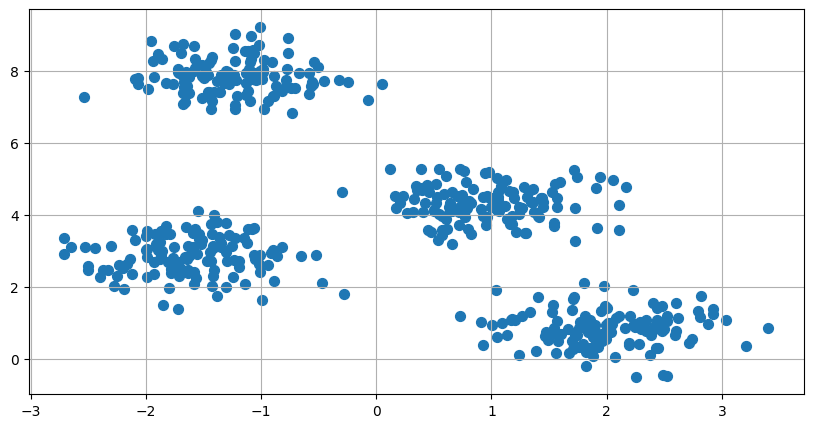

In [15]:
# plot dos dados
fig = plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50)
plt.grid()
plt.show()

In [16]:
# executando o KMeans
km1 = KMeans(n_clusters=4)
km1.fit(X)

KMeans(n_clusters=4)

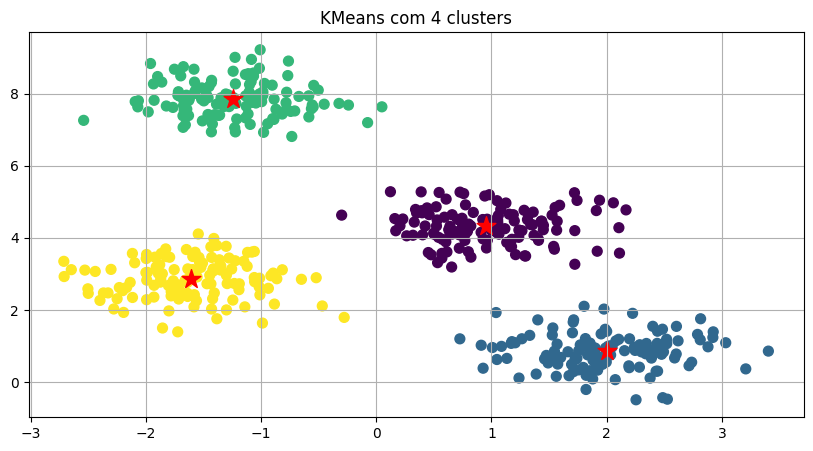

In [17]:
# plot dos clusters
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=km1.labels_, s=50, cmap='viridis')
plt.scatter(km1.cluster_centers_[:, 0], km1.cluster_centers_[:, 1], s=200, c='red', marker='*', label='Centroids')
plt.title('KMeans com 4 clusters')
plt.grid()
plt.show()

### Exemplo mais robusto

Vamos agora para um exemplo bastante complexo.

A ideia é usar *text embedding* e K-means para agrupar filmes.

Utilizando [um dataset](https://aclanthology.org/L18-1274.pdf) traz vários filmes e suas sinopses, vamos transformar
as sinopses em vetores númericos de mesmo tamanho.

Selecionando 1000 destes, montaremos uma matriz e aplicaremos nela o K-means.
A ideia é que filmes similares (ou, ao menos, com sinopses similares) fiquem agrupados.

#### Similares
* https://ai.google.dev/gemini-api/tutorials/clustering_with_embeddings?hl=pt-br

In [18]:
df = pd.read_csv('mpst_embedded.csv')
df.head()

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,plot_embedding
0,tt0366444,Fighting Tommy Riley,Tommy Riley (J. P. Davis) stands in boxing gea...,romantic,val,wikipedia,"[-0.0358068123459816, -0.0028074306901544333, ..."
1,tt0432291,The Fog,As the Californian coastal town of Antonio Bay...,"revenge, murder, storytelling, flashback",train,wikipedia,"[0.007099490612745285, 0.007497160229831934, -..."
2,tt1087472,Safehouse,A beautiful business partner. A peaceful marin...,revenge,train,imdb,"[-0.003003120655193925, 0.0120626799762249, -0..."
3,tt0181262,Thundarr the Barbarian,Thundarr the Barbarian is set in a future (c. ...,"good versus evil, psychedelic",train,wikipedia,"[-0.030307963490486145, 0.05825262516736984, -..."
4,tt4009278,Shut In,"Steven (Charlie Heaton), is a troubled kid who...",revenge,train,wikipedia,"[0.041896771639585495, 0.014580665156245232, -..."


In [19]:
# create matrix
X = df['plot_embedding']
# eval to convert string to list
X = X.apply(eval)
X = np.array(X.tolist())
X

array([[-0.03580681, -0.00280743, -0.17634355, ...,  0.00558269,
        -0.03714745,  0.00748482],
       [ 0.00709949,  0.00749716, -0.23240203, ..., -0.05063584,
        -0.00415005, -0.00378265],
       [-0.00300312,  0.01206268, -0.18488094, ..., -0.06622845,
        -0.01786037,  0.01461979],
       ...,
       [ 0.01493169,  0.02445779, -0.18926524, ..., -0.03183008,
        -0.01466049,  0.00124324],
       [-0.02325751,  0.04028229, -0.19963166, ...,  0.01061876,
        -0.02298516,  0.00704264],
       [ 0.01832164,  0.00723133, -0.20995475, ..., -0.03041354,
        -0.03979909, -0.07004852]], shape=(1000, 768))

In [20]:
X.shape

(1000, 768)

Só para ter uma ideia de um número de clusteres para escolhermos,
vamos ver quantas tags de filme existem.

In [21]:
df['tags'].unique()

array(['romantic', 'revenge, murder, storytelling, flashback', 'revenge',
       'good versus evil, psychedelic', 'revenge, murder',
       'boring, murder, sadist, flashback', 'murder, flashback',
       'revenge, flashback', 'comedy, murder, violence',
       'tragedy, romantic, murder', 'suspenseful, murder', 'melodrama',
       'avant garde, murder, violence, intrigue, flashback, revenge, sadist',
       'good versus evil', 'cult, murder', 'violence, sci-fi', 'violence',
       'psychological, satire, flashback', 'murder', 'cult',
       'romantic, murder', 'romantic, flashback',
       'paranormal, violence, murder', 'horror',
       'good versus evil, revenge, cult',
       'boring, murder, violence, revenge, flashback, romantic',
       'romantic, boring, entertaining',
       'brainwashing, violence, action, murder, flashback',
       'revenge, cult, psychedelic, violence', 'romantic, humor, murder',
       'psychedelic',
       'tragedy, romantic, murder, atmospheric, sentimen

In [22]:
df['tags'].nunique()

548

Há muitas tags possíveis...

Vamos tentar com um número pequeno. Se necessário, aumentamos.

In [23]:
km2 = KMeans(n_clusters=5)
km2.fit(X)

KMeans(n_clusters=5)

In [24]:
df['cluster'] = km2.labels_
df.head()

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,plot_embedding,cluster
0,tt0366444,Fighting Tommy Riley,Tommy Riley (J. P. Davis) stands in boxing gea...,romantic,val,wikipedia,"[-0.0358068123459816, -0.0028074306901544333, ...",2
1,tt0432291,The Fog,As the Californian coastal town of Antonio Bay...,"revenge, murder, storytelling, flashback",train,wikipedia,"[0.007099490612745285, 0.007497160229831934, -...",4
2,tt1087472,Safehouse,A beautiful business partner. A peaceful marin...,revenge,train,imdb,"[-0.003003120655193925, 0.0120626799762249, -0...",3
3,tt0181262,Thundarr the Barbarian,Thundarr the Barbarian is set in a future (c. ...,"good versus evil, psychedelic",train,wikipedia,"[-0.030307963490486145, 0.05825262516736984, -...",0
4,tt4009278,Shut In,"Steven (Charlie Heaton), is a troubled kid who...",revenge,train,wikipedia,"[0.041896771639585495, 0.014580665156245232, -...",3


In [27]:
# analisando primeiros 10 filmes do cluster 1
df[df['cluster'] == 3].head(15)

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,plot_embedding,cluster
2,tt1087472,Safehouse,A beautiful business partner. A peaceful marin...,revenge,train,imdb,"[-0.003003120655193925, 0.0120626799762249, -0...",3
4,tt4009278,Shut In,"Steven (Charlie Heaton), is a troubled kid who...",revenge,train,wikipedia,"[0.041896771639585495, 0.014580665156245232, -...",3
5,tt0022788,The Crooked Circle,"Before a boxer dies in an accident, he mention...","revenge, murder",train,wikipedia,"[0.0028309752233326435, 0.0013937046751379967,...",3
8,tt0990361,La chambre des morts,While on a joyride with the headlights turned ...,"revenge, flashback",test,imdb,"[0.03250681981444359, 0.021760422736406326, -0...",3
9,tt0069840,The Candy Snatchers,Candy (Susan Sennett) is a 16-year-old girl wh...,"comedy, murder, violence",train,wikipedia,"[0.028958631679415703, 0.009187991730868816, -...",3
11,tt4227282,Wrecker,A husband and wife become stranded on a stretc...,"suspenseful, murder",train,wikipedia,"[-0.0023476325441151857, 0.002910785609856248,...",3
12,tt0101565,Changes,Melanie Adams is a divorced mother who gave bi...,melodrama,test,wikipedia,"[0.027810441330075264, -0.006237902212888002, ...",3
13,tt3045616,Mortdecai,Lord Charlie Mortdecai (Johnny Depp) is an ecc...,"avant garde, murder, violence, intrigue, flash...",train,imdb,"[0.0105914156883955, 0.05804316699504852, -0.1...",3
15,tt0077289,California Suite,"In Visitor from New York, Hannah Warren is a M...",romantic,train,wikipedia,"[-0.03449482098221779, 0.0396447591483593, -0....",3
21,tt0042192,All About Eve,"At a prestigious awards ceremony, the celebrit...","psychological, satire, flashback",val,imdb,"[-0.03026406839489937, 0.0443897545337677, -0....",3


Vemos aqui que nosso experimento deu certo, ao menos superficialmente.

Todos os filmes agrupados são melodramáticos. Além disso, duas sinopses contém a palavra "divorced",
exemplificando o agrupamento de textos parecidos.

In [26]:
# quantos membros em cada cluster
df['cluster'].value_counts()

cluster
3    343
4    221
2    199
0    197
1     40
Name: count, dtype: int64

O cluster 1 é um caso interessante. A maior parte dos filmes agrupados é indiano,
o que é natural dado que estamos nos baseado somente nos textos.

In [30]:
df[df['cluster'] == 1].head(10)

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,plot_embedding,cluster
29,tt3380264,Kill Dil,Tutu (Ali Zafar) and Dev (Ranveer Singh) are t...,romantic,train,wikipedia,"[-0.019001202657818794, 0.015802910551428795, ...",1
49,tt0028021,Naniwa erejî,Sumiko Asai (Yoko Umemura) is the owner of the...,tragedy,val,wikipedia,"[-0.022977689281105995, 0.08375377207994461, -...",1
96,tt1618430,Dum Maaro Dum,"The film starts with a footballer, Lorry (Prat...","revenge, murder, romantic",train,wikipedia,"[-0.03385084494948387, 0.01818382926285267, -0...",1
117,tt2199711,Vishwaroopam,The film opens in a rundown pigeon shop in New...,violence,train,wikipedia,"[-0.02620077319443226, 0.02206355147063732, -0...",1
127,tt0439662,Fanaa,Zooni Ali Beg (Kajol) is a blind Kashmiri woma...,"tragedy, romantic, murder",train,wikipedia,"[-0.015928933396935463, 0.02561921998858452, -...",1
136,tt0066766,Andaz,Ajay (Anil Kapoor) an intelligent ex-student o...,romantic,test,wikipedia,"[0.015088893473148346, 0.033560484647750854, -...",1
151,tt0986213,Aaja Nachle,Dia (Madhuri Dixit) is a choreographer who liv...,flashback,test,wikipedia,"[-0.03386222571134567, 0.015029643662273884, -...",1
173,tt0050188,Mother India,"The film is set in 1957, the present day at th...","revenge, melodrama",test,wikipedia,"[0.028819352388381958, 0.018445054069161415, -...",1
179,tt0112738,Criminal,After witnessing the unfortunate death of a wo...,"romantic, murder",train,wikipedia,"[0.017427556216716766, 0.039789244532585144, -...",1
191,tt0995752,Tashan,Jimmy Cliff (Saif Ali Khan) is a call center e...,"romantic, revenge, murder, violence, flashback",train,wikipedia,"[0.007933019660413265, 0.05561470985412598, -0...",1


Uma ideia para tentar aproximar esse conceito de um algoritmo de recomendação seria aplicar uma
técnica como o **elbow method** para encontrar um número ideal de clusters.